### Info

The models trained on datasets that split according to gestational ages were evaluated in this notebook. There might be slight differences between evaluation scores in Tensorboard files and the results below due to 'overlap mode' of torchio library. 'average' overlap mode gives better results than 'crop' overlap mode but this didn't affect the models performances. The 'average' overlap mode used to obtain results below.

In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchio as tio
import torchvision.transforms as transforms

from modules.Dataset import *
from modules import Evaluator3D, models
from modules.LossFunctions import DC_and_CE_loss, GDiceLossV2
from modules.Predictor import Predictor
from modules.Transforms import *
from modules.Utils import *

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset_path = "../Data/lucas/"

# Transformations.
transform_eval = None

# Split dataset.
early_weeks_val = MRIDataset(EarlyWeeks, "val", dataset_path, transform=transform_eval)
early_weeks_test = MRIDataset(EarlyWeeks, "test", dataset_path, transform=transform_eval)

middle_weeks_val = MRIDataset(MiddleWeeks, "val", dataset_path, transform=transform_eval)
middle_weeks_test = MRIDataset(MiddleWeeks, "test", dataset_path, transform=transform_eval)

late_weeks_val = MRIDataset(LateWeeks, "val", dataset_path, transform=transform_eval)
late_weeks_test = MRIDataset(LateWeeks, "test", dataset_path, transform=transform_eval)

torch.manual_seed(0)
early_val_loader = torch.utils.data.DataLoader(dataset=early_weeks_val, batch_size=1)
early_test_loader = torch.utils.data.DataLoader(dataset=early_weeks_test, batch_size=1)

middle_val_loader = torch.utils.data.DataLoader(dataset=middle_weeks_val, batch_size=1)
middle_test_loader = torch.utils.data.DataLoader(dataset=middle_weeks_test, batch_size=1)

late_val_loader = torch.utils.data.DataLoader(dataset=late_weeks_val, batch_size=1)
late_test_loader = torch.utils.data.DataLoader(dataset=late_weeks_test, batch_size=1)


early_weeks_val.meta_data = early_weeks_val.meta_data.drop(columns=['Unnamed: 3'])
early_weeks_test.meta_data = early_weeks_test.meta_data.drop(columns=['Unnamed: 3'])

middle_weeks_val.meta_data = middle_weeks_val.meta_data.drop(columns=['Unnamed: 3'])
middle_weeks_test.meta_data = middle_weeks_test.meta_data.drop(columns=['Unnamed: 3'])

late_weeks_val.meta_data = late_weeks_val.meta_data.drop(columns=['Unnamed: 3'])
late_weeks_test.meta_data = late_weeks_test.meta_data.drop(columns=['Unnamed: 3'])

In [4]:
criterion = DC_and_CE_loss({'batch_dice': True, 'smooth': 1e-5, 'do_bg': False, 'square': False}, {})

### Warning! 
Tensorboard event files contains validation scores, not test scores.

### EarlyWeeks

In [25]:
path_events_file = '../output/UNet3D/Iteration_20222812/run_early/events.out.tfevents.1672256397.DESKTOP-BN0TMAF.4360.0'
results = read_scalars(path_events_file, -1)

Epoch:  10


In [6]:
early_weeks_model = models.UNet3D().to(device)
early_weeks_model.load_state_dict(torch.load("../output/UNet3D/Iteration_20222812/run_early/weights/9_model.pth"))

<All keys matched successfully>

Validation : 100%|█████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.59s/it, Loss: -0.7227]


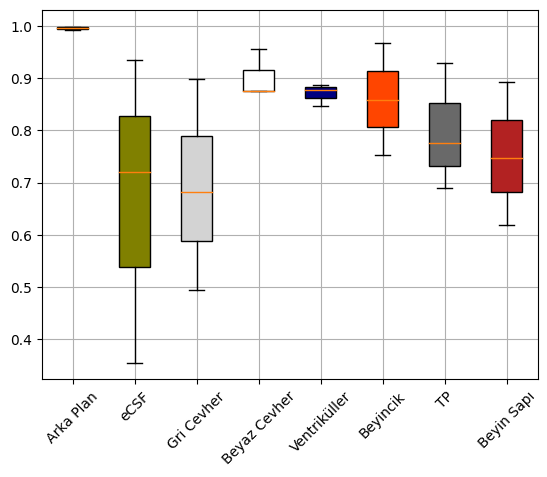

,0,1,2,3,4,5,6,7
0,0.996069,0.669747,0.691235,0.902564,0.870709,0.859749,0.798133,0.753052


In [7]:
evaluator = Evaluator3D(criterion, early_weeks_model, (128, 128, 128), early_val_loader)
_, scores = evaluator.evaluate()
avg_scores = print_evaluation_results(scores, early_weeks_val, lang='tr')
pd.DataFrame(avg_scores).T

Validation : 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.71s/it]


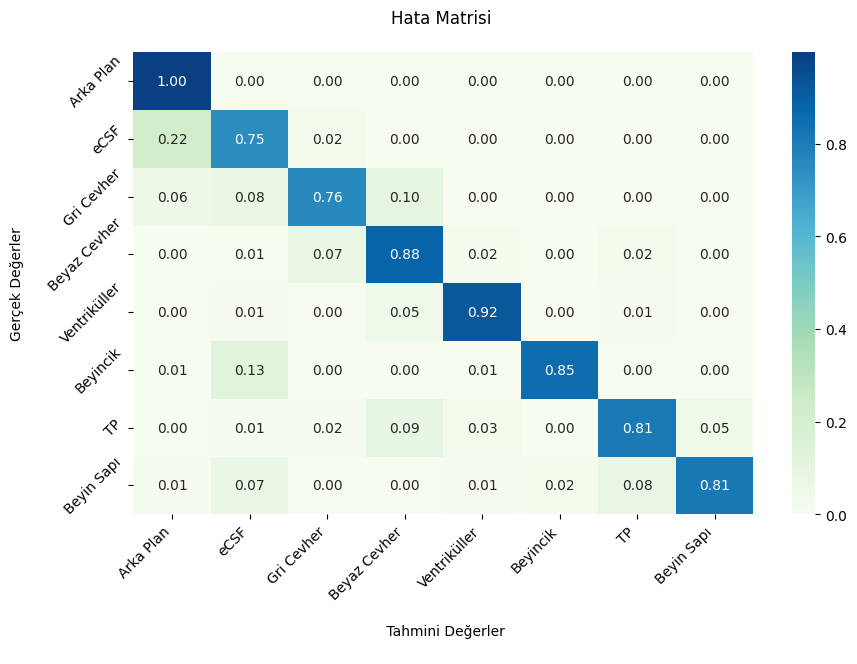

In [8]:
evaluator.calculate_cm()
evaluator.plot_confusion_matrix(lang='tr')

Validation : 100%|█████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.90s/it, Loss: -0.7421]


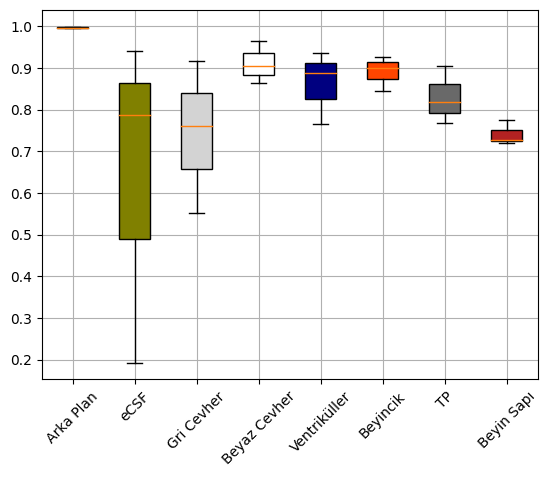

,0,1,2,3,4,5,6,7
0,0.996541,0.639723,0.743375,0.911058,0.862096,0.890938,0.829519,0.74074


In [9]:
tester = Evaluator3D(criterion, early_weeks_model, (128, 128, 128), early_test_loader)
_, scores = tester.evaluate()
avg_scores = print_evaluation_results(scores, early_weeks_test, lang='tr')
pd.DataFrame(avg_scores).T

Validation : 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.80s/it]


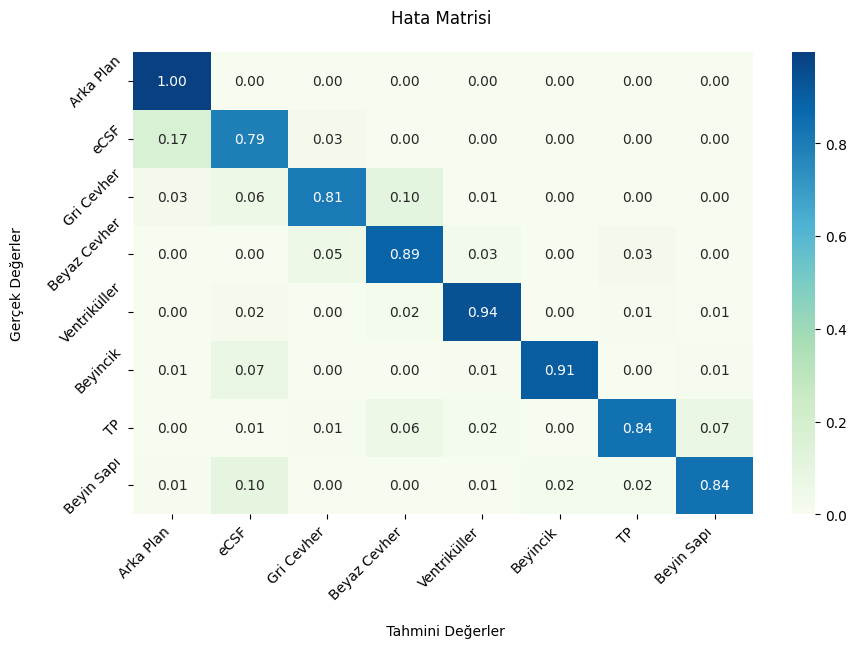

In [10]:
tester.calculate_cm()
tester.plot_confusion_matrix(lang='tr')

### MiddleWeeks

In [27]:
path_events_file = '../output/UNet3D/Iteration_20222812/run_middle/events.out.tfevents.1672262049.DESKTOP-BN0TMAF.10392.0'
results = read_scalars(path_events_file, -1)

Epoch:  22


In [28]:
results

{'0-Background and Non-Brain': 0.9974,
 '1-Extra-axial CSF': 0.8819,
 '2-Gray Matter and developing cortical plate': 0.8383,
 '3-White matter and subplate': 0.9426,
 '4-Lateral ventricles': 0.898,
 '5-Cerebellum': 0.9063,
 '6-Thalamus and putamen': 0.8958,
 '7-Brainstem': 0.8699,
 'Learning rate': 0.001,
 'Training loss': -0.8505,
 'Validation loss': -0.8416}

In [12]:
middle_weeks_model = models.UNet3D().to(device)
middle_weeks_model.load_state_dict(torch.load("../output/UNet3D/Iteration_20222812/run_middle/weights/21_model.pth"))

<All keys matched successfully>

Validation : 100%|█████████████████████████████████████████████████████| 6/6 [00:23<00:00,  3.97s/it, Loss: -0.8416]


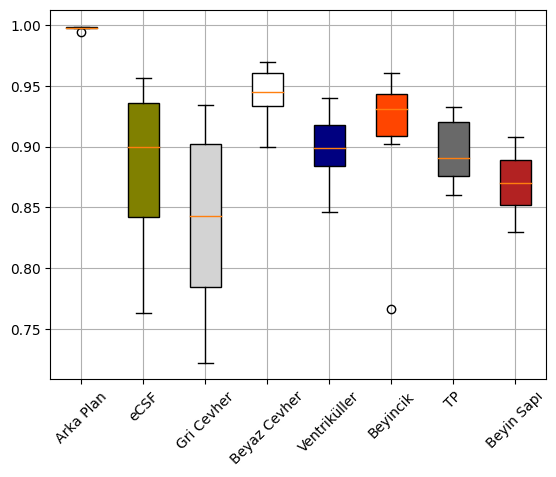

,0,1,2,3,4,5,6,7
0,0.997411,0.881894,0.838253,0.942556,0.897962,0.906263,0.895777,0.869949


In [13]:
evaluator = Evaluator3D(criterion, middle_weeks_model, (128, 128, 128), middle_val_loader)
_, scores = evaluator.evaluate()
avg_scores = print_evaluation_results(scores, middle_weeks_val, lang='tr')
pd.DataFrame(avg_scores).T

Validation : 100%|████████████████████████████████████████████████████████████████████| 6/6 [00:28<00:00,  4.78s/it]


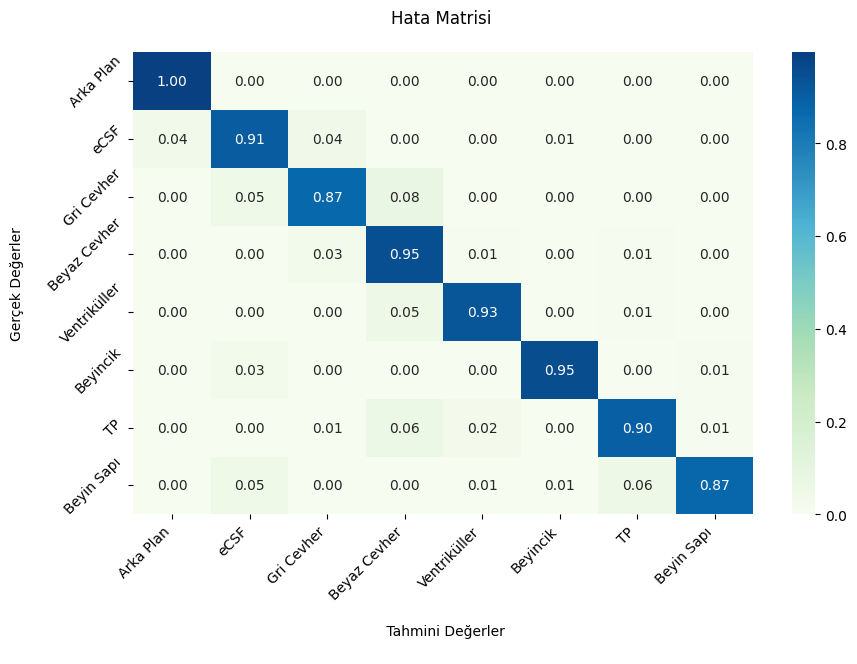

In [14]:
evaluator.calculate_cm()
evaluator.plot_confusion_matrix(lang='tr')

Validation : 100%|█████████████████████████████████████████████████████| 6/6 [00:23<00:00,  3.97s/it, Loss: -0.8534]


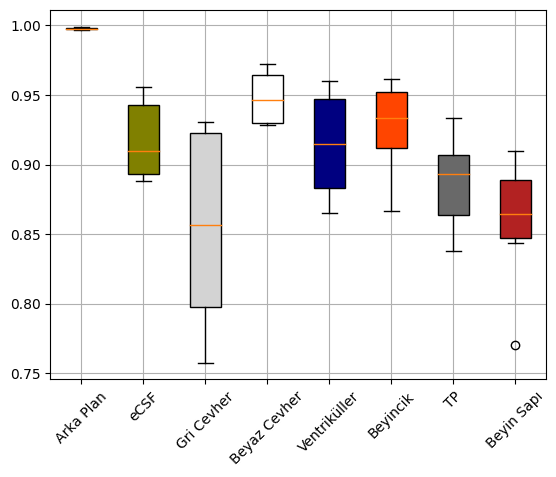

,0,1,2,3,4,5,6,7
0,0.997859,0.917503,0.853863,0.947951,0.914199,0.926492,0.887195,0.857841


In [15]:
tester = Evaluator3D(criterion, middle_weeks_model, (128, 128, 128), middle_test_loader)
_, scores = tester.evaluate()
avg_scores = print_evaluation_results(scores, middle_weeks_test, lang='tr')
pd.DataFrame(avg_scores).T

Validation : 100%|████████████████████████████████████████████████████████████████████| 6/6 [00:28<00:00,  4.82s/it]


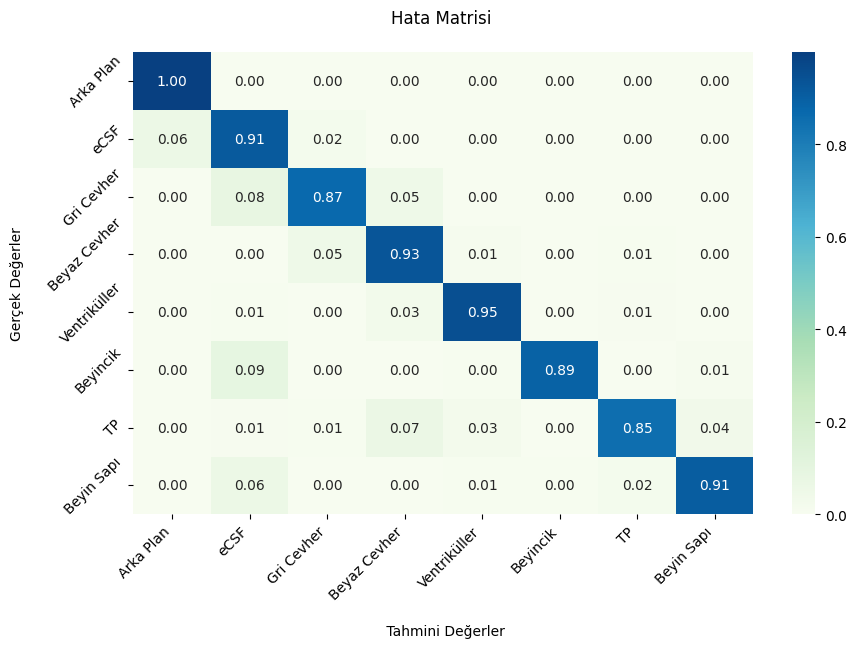

In [16]:
tester.calculate_cm()
tester.plot_confusion_matrix(lang='tr')

### LateWeeks

In [29]:
path_events_file = '../output/UNet3D/Iteration_20222812/run_late/events.out.tfevents.1672295045.DESKTOP-BN0TMAF.10424.0'
results = read_scalars(path_events_file, -1)

Epoch:  18


In [30]:
results

{'0-Background and Non-Brain': 0.9977,
 '1-Extra-axial CSF': 0.9081,
 '2-Gray Matter and developing cortical plate': 0.8039,
 '3-White matter and subplate': 0.9424,
 '4-Lateral ventricles': 0.8764,
 '5-Cerebellum': 0.9472,
 '6-Thalamus and putamen': 0.9191,
 '7-Brainstem': 0.9109,
 'Learning rate': 0.0017,
 'Training loss': -0.8288,
 'Validation loss': -0.8435}

In [18]:
late_weeks_model = models.UNet3D().to(device)
late_weeks_model.load_state_dict(torch.load("../output/UNet3D/Iteration_20222812/run_late/weights/17_model.pth"))

<All keys matched successfully>

Validation : 100%|█████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.97s/it, Loss: -0.8435]


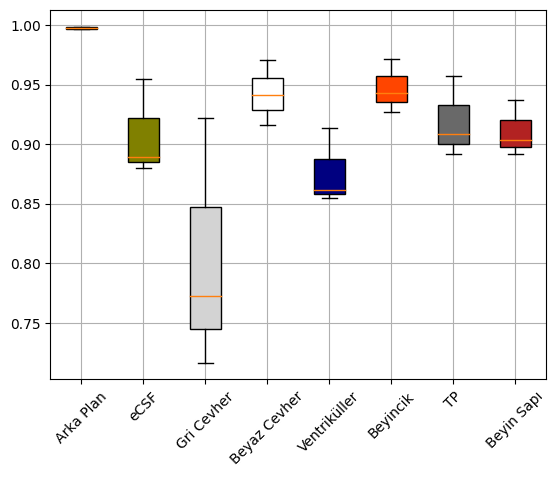

,0,1,2,3,4,5,6,7
0,0.997673,0.908079,0.80385,0.942423,0.876434,0.947162,0.919085,0.91094


In [19]:
evaluator = Evaluator3D(criterion, late_weeks_model, (128, 128, 128), late_val_loader)
_, scores = evaluator.evaluate()
avg_scores = print_evaluation_results(scores, late_weeks_val, lang='tr')
pd.DataFrame(avg_scores).T

Validation : 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.72s/it]


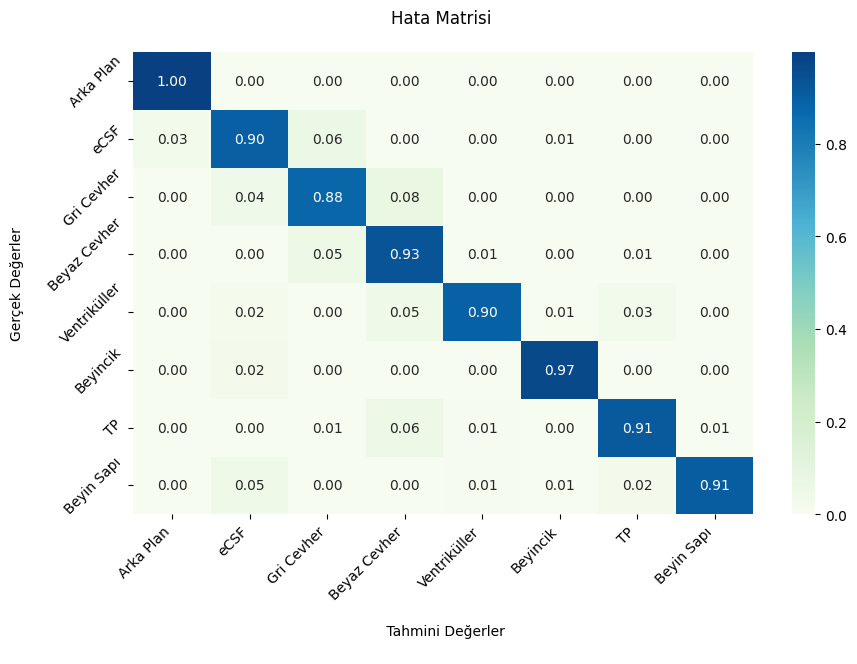

In [20]:
evaluator.calculate_cm()
evaluator.plot_confusion_matrix(lang='tr')

Validation : 100%|█████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.02s/it, Loss: -0.8554]


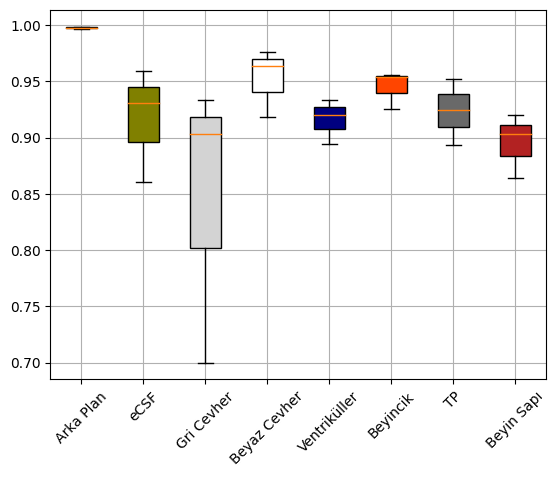

,0,1,2,3,4,5,6,7
0,0.997629,0.916661,0.845512,0.952533,0.916035,0.944985,0.923276,0.895513


In [21]:
tester = Evaluator3D(criterion, late_weeks_model, (128, 128, 128), late_test_loader)
_, scores = tester.evaluate()
avg_scores = print_evaluation_results(scores, late_weeks_test, lang='tr')
pd.DataFrame(avg_scores).T

Validation : 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.91s/it]


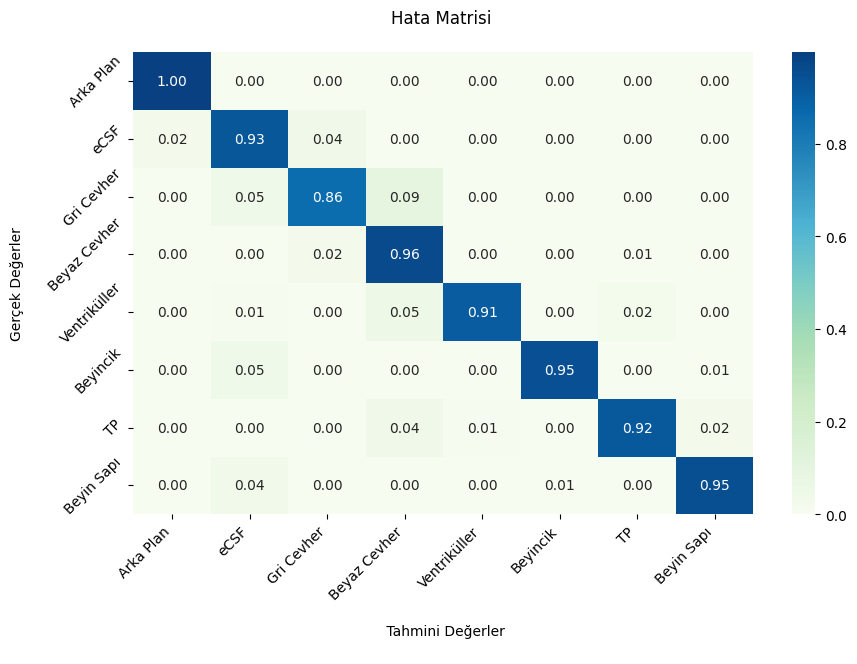

In [22]:
tester.calculate_cm()
tester.plot_confusion_matrix(lang='tr')